In [64]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importar MLFLOW
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature

# Importar elementos del modelo
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report, confusion_matrix, accuracy_score

In [14]:
#!pip install mlflow

In [15]:
track_uri = "http://localhost:8080/" # Esto puede ser que cambie por http://0.0.0.0:1234
mlflow.set_tracking_uri(track_uri)
mlflow.set_registry_uri("sqlite:////tmp/registry.db")

In [16]:
# Generando el experimento o cargandolo si existe
experiment_name = "Proyecto_Dengue_AAA"
mlflow.set_experiment(experiment_name)

# Cargando la información
client = mlflow.tracking.MlflowClient()
experiment_id = client.get_experiment_by_name(experiment_name).experiment_id

# Validacion
print(f"MLflow Version: {mlflow.__version__}")
print(f"Tracking URI: {mlflow.tracking.get_tracking_uri()}")
print(f"Nombre del experimento: {experiment_name}")
print(f"ID del experimento: {experiment_id}")

2024/05/26 06:19:21 INFO mlflow.tracking.fluent: Experiment with name 'Proyecto_Dengue_AAA' does not exist. Creating a new experiment.


MLflow Version: 2.13.0
Tracking URI: http://localhost:8080/
Nombre del experimento: Proyecto_Dengue_AAA
ID del experimento: 999845863419534997


## Cargar datos

In [32]:
# Cargar datos desde el archivo Parquet
df = pd.read_parquet("processed_train_data.parquet")

In [33]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,DEFUNCION
0,2.512231,0.088238,0.145585,0.120013,0.02044,0.048416,0.043871,0.028179,0.112447,1.065000,1.935340,-0.07302,-0.258417,-0.021438,0.284409,2.0
1,-0.150693,0.088238,0.145585,0.120013,0.02044,0.048416,0.043871,0.028179,0.112447,-0.938967,-0.516705,-0.07302,-0.258417,46.646641,-3.516066,2.0
2,-0.660614,0.088238,0.145585,0.120013,0.02044,0.048416,0.043871,0.028179,0.112447,-0.938967,-0.516705,-0.07302,-0.258417,-0.021438,0.284409,2.0
3,-0.207351,0.088238,0.145585,0.120013,0.02044,0.048416,0.043871,0.028179,0.112447,-0.938967,-0.516705,-0.07302,-0.258417,-0.021438,0.284409,2.0
4,-1.113878,0.088238,0.145585,0.120013,0.02044,0.048416,0.043871,0.028179,0.112447,1.065000,1.935340,-0.07302,-0.258417,-0.021438,0.284409,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23941,-1.283852,0.088238,0.145585,0.120013,0.02044,0.048416,0.043871,0.028179,0.112447,1.065000,-0.516705,-0.07302,-0.258417,-0.021438,0.284409,2.0
23942,-1.000562,0.088238,0.145585,0.120013,0.02044,0.048416,0.043871,0.028179,0.112447,-0.938967,-0.516705,-0.07302,-0.258417,-0.021438,0.284409,2.0
23943,1.039124,-11.333042,0.145585,0.120013,0.02044,0.048416,0.043871,0.028179,0.112447,-0.938967,-0.516705,-0.07302,-0.258417,-0.021438,0.284409,2.0
23944,-0.660614,0.088238,0.145585,0.120013,0.02044,0.048416,0.043871,0.028179,0.112447,-0.938967,-0.516705,-0.07302,-0.258417,-0.021438,0.284409,2.0


In [34]:
# Separar características y etiquetas
X = df.drop(columns=['DEFUNCION'])
y = df['DEFUNCION']

In [35]:
X.shape

(23946, 15)

In [36]:
y.shape

(23946,)

In [47]:
# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
y_train.shape

(19156,)

## Ejecución de modelos

/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9964509394572025
Confusion Matrix:
 [[   0   17]
 [   0 4773]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        17
         2.0       1.00      1.00      1.00      4773

    accuracy                           1.00      4790
   macro avg       0.50      0.50      0.50      4790
weighted avg       0.99      1.00      0.99      4790



FileNotFoundError: [Errno 2] No such file or directory: 'confusion_matrix.png'

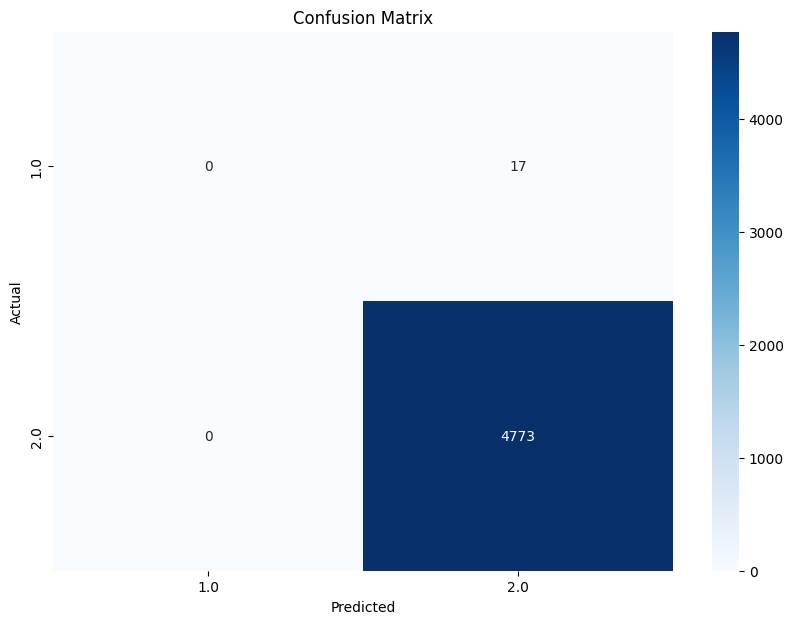

In [66]:
# Inicia una nueva ejecución en MLflow
with mlflow.start_run(run_name="logistic Regression 1"):
    # Inicializa el modelo de Regresión Logística con los hiperparámetros
    log_regression = LogisticRegression(max_iter=1000)

    # Entrena el modelo en los datos de entrenamiento
    log_regression.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = log_regression.predict(X_test)

    # Evalúa el rendimiento del modelo
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Imprime las métricas de evaluación
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", classification_rep)

    # Registra los hiperparámetros en MLflow
    mlflow.log_param("max_iter", 1000)
    mlflow.log_param("solver", "lbfgs")
    mlflow.log_param("multi_class", "auto")
    mlflow.log_param("random_state", 8888)

    # Registra las métricas en MLflow
    mlflow.log_metric("accuracy", accuracy)

    # Guarda el modelo en MLflow
    mlflow.sklearn.log_model(log_regression, "logistic_regression_model")

    # Guarda la matriz de confusión como un artefacto
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")

    # Registra la figura en MLflow
    mlflow.log_artifact("confusion_matrix.png")

# Finaliza la ejecución
mlflow.end_run()

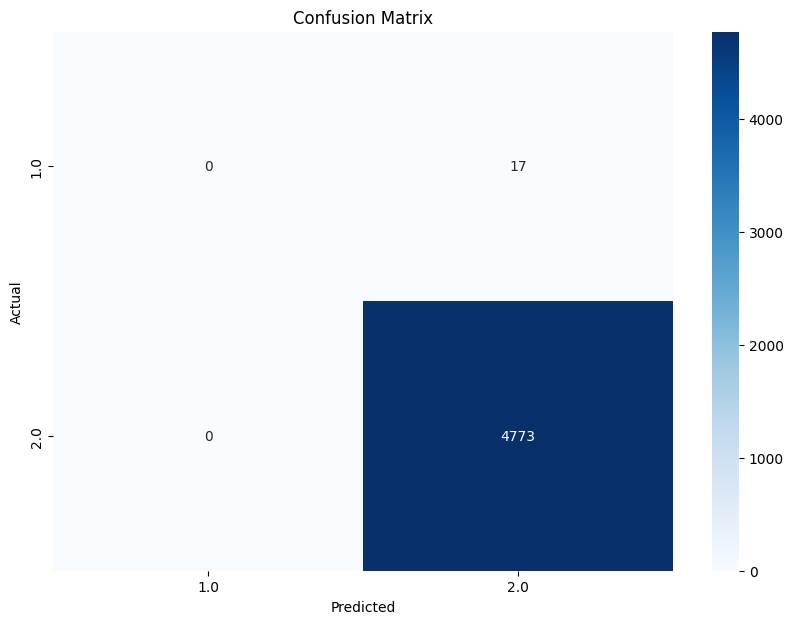

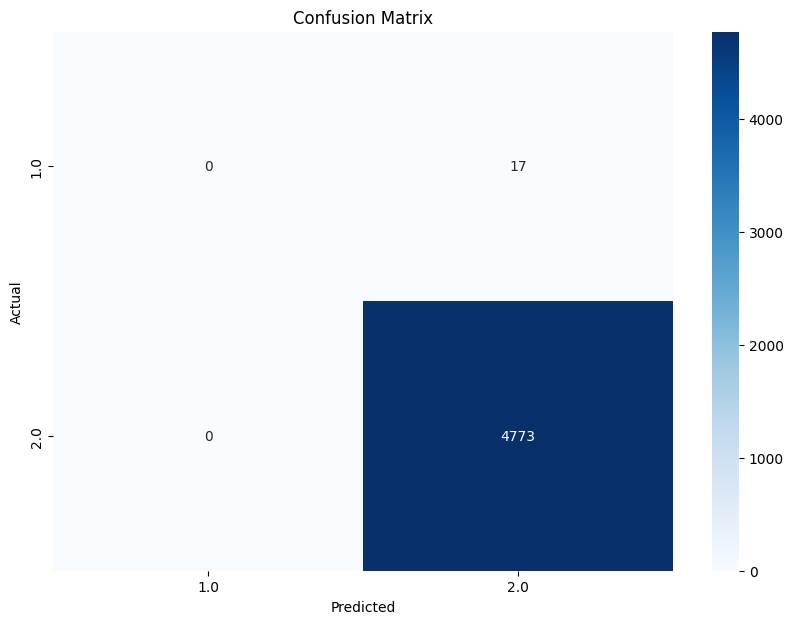

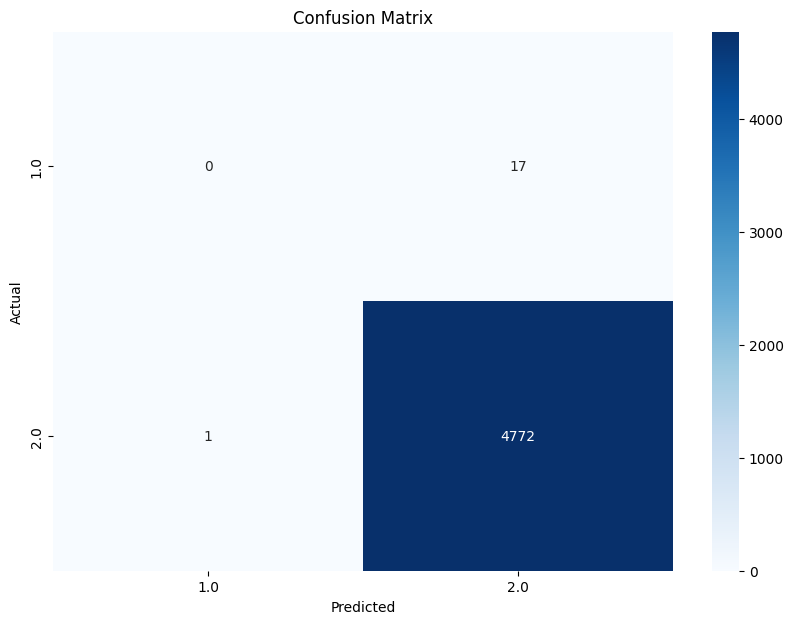

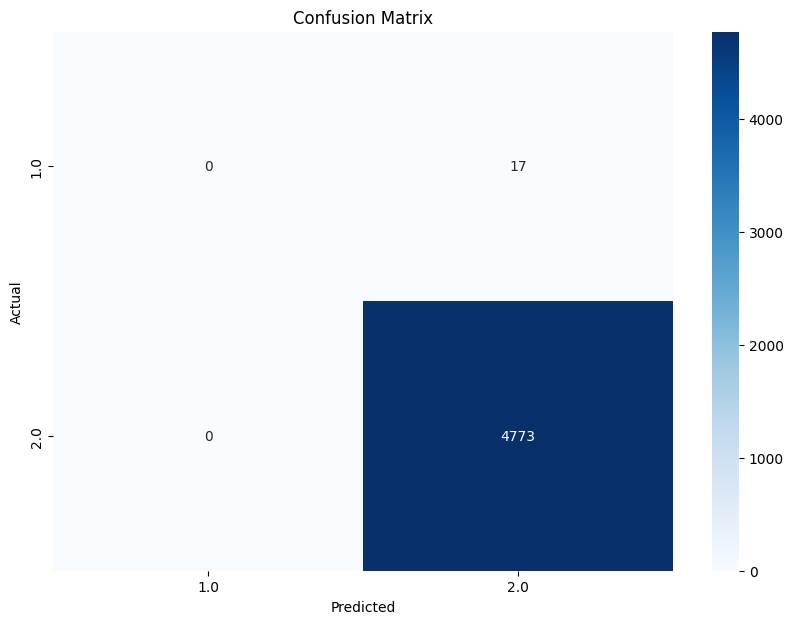

In [ ]:
# Definir modelos
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Entrenar y evaluar modelos
with mlflow.start_run():
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Calcular métricas
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Calcular ROC AUC
        y_prob = model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr')

        # Guardar métricas en MLflow
        mlflow.log_metric(f'{name} Accuracy', accuracy)
        mlflow.log_metric(f'{name} F1 Score', f1)
        mlflow.log_metric(f'{name} ROC AUC', roc_auc)
        
        # Guarda la matriz de confusión como un artefacto
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 7))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        
        # Generar curva ROC
        if model.__class__.__name__ != "GradientBoostingClassifier":  # Curva ROC no es aplicable para Gradient Boosting
            fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label=model.classes_[1])
            plt.figure()
            plt.plot(fpr, tpr, color='darkorange', lw=2)
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'{name} ROC Curve')
            plt.savefig(f'{name}_roc_curve.png')
            plt.close()
        
    # Guardar gráficos en MLflow
    mlflow.log_artifacts('.')